In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load Our Dataset

In [ ]:
df = pd.read_csv('/content/1659264665216-flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
# Change object to dateandtime type

df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']] = df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']].apply(pd.to_datetime, errors='coerce')

In [ ]:
# Check all columns data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

# Statistic Descriptive



In [ ]:
# (numerical data)
# exclude column `MEMBER_NO`

df.drop(['MEMBER_NO'],axis=1).describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [ ]:
# Statistic descriptive for object data (Categorical)

df.select_dtypes('object').describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


In [ ]:
# Statistic descriptive for datetime data

df.select_dtypes('datetime64').describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62988,62567
unique,3068,3406,1,730
top,2011-01-13 00:00:00,2013-02-16 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00
freq,184,96,62988,959
first,2004-11-01 00:00:00,1905-12-31 00:00:00,2014-03-31 00:00:00,2012-04-01 00:00:00
last,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


Observasi:

*   Berdasarkan data Numerik: Median Total jarak kumulatif penerbangan yg sudah dilakukan adalah 9994 Km. Kemudian Median Umur Customer adalah 41 tahun

* Top Categorical Data:
1. Berdasarkan jenis kelamin adalah Laki-laki (Male), yaitu sebanyak 48134 orang
2. Berdasarkan kota asal adalah guangzhou
3. Berdasarkan Provinsi asal adalah guangzhou	

* Dapat diasumsikan bahwa untuk data penerbangan ini berasal dari salah satu penerbangan di China dikarenakan guangzhou dan guangzhou merupakan kota dan provinsi di China

* Berdasarkan column LOAD_TIME: Tanggal data diambil adalah pada tanggal 31 Mei 2014 

# Matrix Correlation

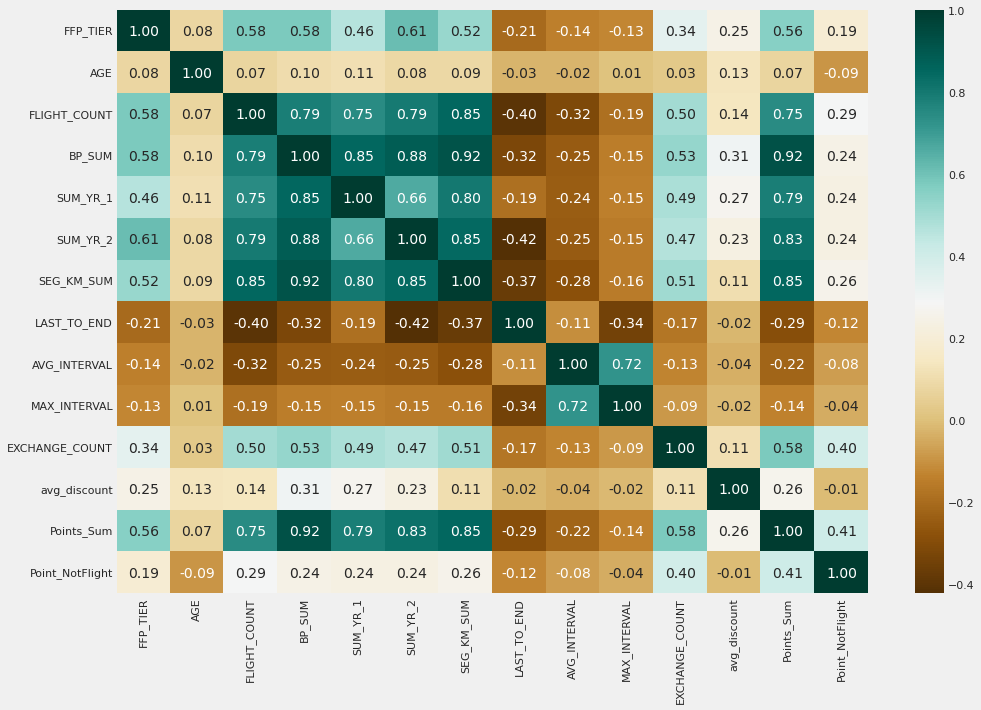

In [ ]:
# adjust the figure size
plt.figure(figsize=(15,10))

# plot the heatmap
correlation = df.drop(['MEMBER_NO'],axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='BrBG', fmt='.2f')

Terdapat fitur yang memiliki korelasi yang tinggi dengan fitur lainnya, diantaranya:

* FLIGHT_COUNT
* BP_SUM
* SUM_YR_1
* SUM_YR_2
* SEG_KM_SUM
* Points_Sum


# Data Preprocessing

In [ ]:
# Check Missing Value

data_nan = df.isna().sum().reset_index()
data_nan.columns = ['feature','missing_value']
data_nan['percentage'] = round((data_nan['missing_value']/len(df))*100,3)
data_nan = data_nan.sort_values('percentage', ascending=False).reset_index(drop=True)
data_nan = data_nan[data_nan['percentage']>0]
data_nan

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.157
1,WORK_CITY,2269,3.602
2,SUM_YR_1,551,0.875
3,LAST_FLIGHT_DATE,421,0.668
4,AGE,420,0.667
5,SUM_YR_2,138,0.219
6,WORK_COUNTRY,26,0.041
7,GENDER,3,0.005


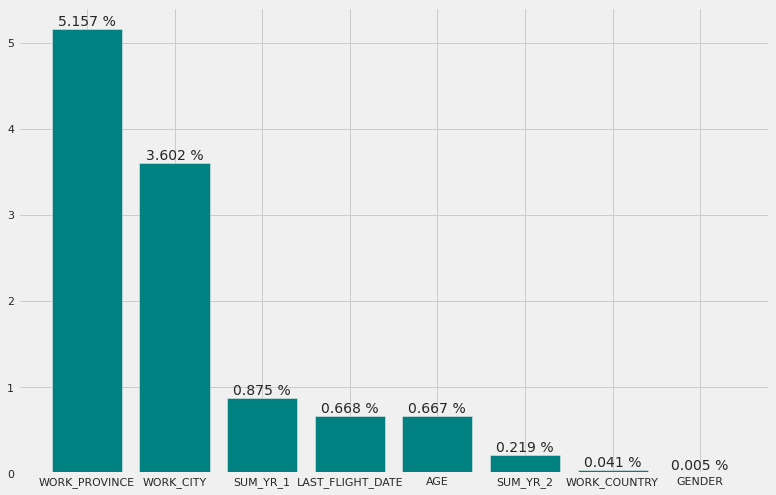

In [ ]:
# Plot in bar chart (Column Missing Value)

fig, ax = plt.subplots(figsize=(12,8))
bars = plt.bar(x=data_nan['feature'], height= data_nan['percentage'], color = 'teal')

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')

Terdapat 7 fitur yang memiliki missing value (nilai yang hilang), yaitu 3 untuk data numerical dan 4 data categorical.

- WORK_PROVINCE : 3248 missing value (5.157%)
- WORK_CITY	    : 2269 missing value (3.602%)
- SUM_YR_1	    : 551 missing value (0.875%)
- AGE	          : 420 missing value (0.667%)
- SUM_YR_2	    : 138 missing value (0.219%)
- WORK_COUNTRY	: 26 missing value (0.041%)
- GENDER	      : 3 missing value (0.005%)



In [ ]:
# Drop Missing Value
df = df.dropna().reset_index(drop=True)
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
2,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
3,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
4,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,...,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.0,2014-03-31,...,0.0,3848,2013-01-20,437,0.000000,0,0,0.000000,0,0
57856,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,...,0.0,1134,2013-06-09,297,4.000000,4,1,0.000000,12318,22
57857,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.0,2014-03-31,...,0.0,8016,2014-01-03,89,37.000000,60,14,0.000000,106972,43
57858,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,...,0.0,2594,2014-03-03,29,166.000000,166,0,0.000000,0,0


In [ ]:
# Re-check Missing Value
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [ ]:
df.shape

(57860, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          57860 non-null  int64         
 1   FFP_DATE           57860 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  57860 non-null  datetime64[ns]
 3   GENDER             57860 non-null  object        
 4   FFP_TIER           57860 non-null  int64         
 5   WORK_CITY          57860 non-null  object        
 6   WORK_PROVINCE      57860 non-null  object        
 7   WORK_COUNTRY       57860 non-null  object        
 8   AGE                57860 non-null  float64       
 9   LOAD_TIME          57860 non-null  datetime64[ns]
 10  FLIGHT_COUNT       57860 non-null  int64         
 11  BP_SUM             57860 non-null  int64         
 12  SUM_YR_1           57860 non-null  float64       
 13  SUM_YR_2           57860 non-null  float64       
 14  SEG_KM

In [ ]:
# Check Duplicate Values
df.duplicated().sum()

0

# Feature Selection


LRFMC Feature:

- L = LOAD_TIME - FFP_DATE
> The number of months between the time of membership and the end of observation window = the end time of observation window - the time of membership

- R = LAST_TO_END
> The number of months from the last time the customer took the company's aircraft to the end of the observation windows = the time from the last flight to the end of the observation window

- F = FLIGHT_COUNT
> Number of times the customer takes the company's aircraft in the observation window = number of flight in the observation window

- M = SEG_KM_SUM
> Accumulated flight history of the customer in observation time = total flight kilometers of observation window

- C = AVG_DISCOUNT
> Average value of the discount coefficient corresponding to the passenger space during the observation time = average discount rate




In [ ]:
# make a dataframe RFMC first based on above information
df_LRFMC = df[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].reset_index()

# make L indicator by subtracting the values of column LOAD_TIME and FFP_DATE
# and calculate the date difference in months by dividing the result by 30
df_LRFMC['L'] = (df['LOAD_TIME'] - df['FFP_DATE']).dt.days/30

# rename column name since we want to be seen as RFMC
df_LRFMC.rename(columns={'LAST_TO_END':'R','FLIGHT_COUNT':'F','SEG_KM_SUM':'M','avg_discount':'C'}, inplace = True)

# reorder the column to be LRFMC
ColumnsTitles = ['L', 'R', 'F', 'M', 'C']
df_LRFMC = df_LRFMC.reindex(columns=ColumnsTitles)
df_LRFMC

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,87.166667,11,135,283712,1.254676
2,68.233333,97,23,281336,1.090870
3,60.533333,5,152,309928,0.970658
4,74.700000,79,92,294585,0.967692
...,...,...,...,...,...
57855,14.500000,437,2,3848,0.000000
57856,34.866667,297,2,1134,0.000000
57857,49.466667,89,4,8016,0.000000
57858,97.433333,29,2,2594,0.000000


# Distribution and Outlier

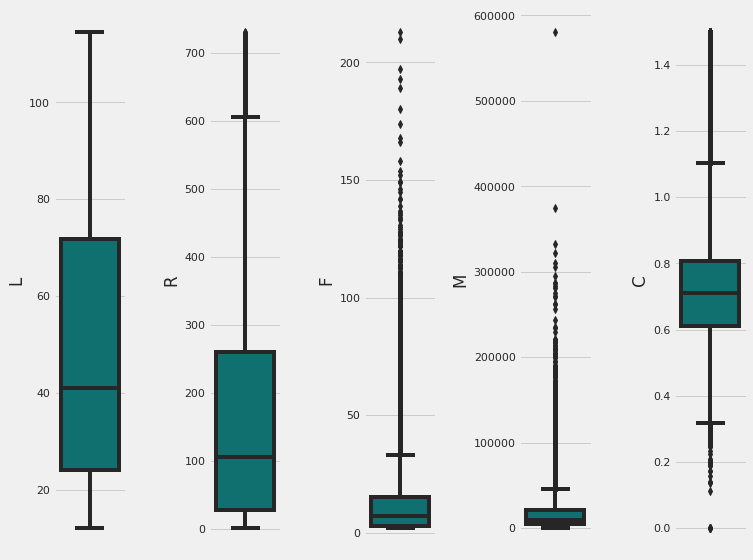

In [ ]:
# adjust the figure size 
plt.figure(figsize=(15,8))

# plotting
feat_num = list(df_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_LRFMC[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

In [ ]:
# Log Transformation to Reduce Outlier

df_log_LRFMC = df_LRFMC.copy()
df_log_LRFMC['L'] = np.log10(df_LRFMC['L'] + 1)
df_log_LRFMC['R'] = np.log10(df_LRFMC['R'] + 1)
df_log_LRFMC['F'] = np.log10(df_LRFMC['F'] + 1)
df_log_LRFMC['M'] = np.log10(df_LRFMC['M'] + 1)
df_log_LRFMC['C'] = np.log10(df_LRFMC['C'] + 1)
df_log_LRFMC

,L,R,F,M,C
0,1.959995,0.301030,2.324282,5.763965,0.292619
1,1.945304,1.079181,2.133539,5.452879,0.353084
2,1.840315,1.991226,1.380211,5.449227,0.320327
3,1.789110,0.778151,2.184691,5.491262,0.294611
4,1.879096,1.903090,1.968483,5.469212,0.293957
...,...,...,...,...,...
57855,1.190332,2.641474,0.477121,3.585348,0.000000
57856,1.554691,2.474216,0.477121,3.054996,0.000000
57857,1.703005,1.954243,0.698970,3.904012,0.000000
57858,1.993142,1.477121,0.477121,3.414137,0.000000


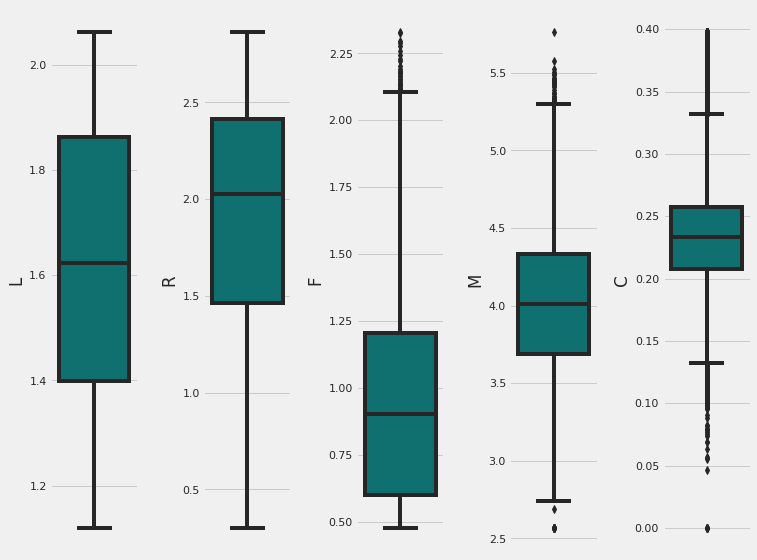

In [ ]:
# adjust the figure size
plt.figure(figsize=(15,8))

# plotting
feat_num = list(df_log_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_log_LRFMC[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

In [ ]:
# Remove Outlier based on IQR

df_log_LRFMC.describe()

,L,R,F,M,C
count,57860.000000,57860.000000,57860.000000,57860.000000,57860.000000
mean,1.621407,1.905263,0.947588,4.016779,0.233304
std,0.262555,0.637949,0.362379,0.440114,0.045156
min,1.119476,0.301030,0.477121,2.567026,0.000000
25%,1.398519,1.462398,0.602060,3.688687,0.207370
50%,1.623249,2.025306,0.903090,4.008983,0.233359
75%,1.862330,2.415390,1.204120,4.332842,0.257278
max,2.062833,2.864511,2.330414,5.763965,0.397940


In [ ]:
# Define IQR = Q3 - Q1
IQR = df_log_LRFMC.quantile(0.75) - df_log_LRFMC.quantile(0.25)
# Upper_limit = Q3 + 1.5 * IQR
upper_limit = df_log_LRFMC.quantile(0.75) + 1.5 * IQR
# Lower_limit = Q1 - 1.5 * IQR
lower_limit = df_log_LRFMC.quantile(0.25) - 1.5 * IQR

print(f'rows before IQR outlier filter: {len(df_log_LRFMC)}')

# Filter data between the limits
df_IQR_LRFMC = df_log_LRFMC.copy()
df_IQR_LRFMC = df_log_LRFMC[(df_log_LRFMC >= lower_limit) & (df_log_LRFMC <= upper_limit)]
    
# drop nan data
df_IQR_LRFMC = df_IQR_LRFMC.dropna().reset_index(drop=True)

print('rows after IQR outlier filter', len(df_IQR_LRFMC))
df_IQR_LRFMC

rows before IQR outlier filter: 57860
rows after IQR outlier filter 55220


,L,R,F,M,C
0,2.049606,1.544068,1.397940,5.278328,0.319568
1,1.339783,0.301030,2.045323,5.273207,0.304486
2,2.055633,1.204120,1.748188,5.187151,0.331630
3,1.675473,0.845098,1.929419,5.271428,0.287361
4,1.679125,0.954243,1.491362,5.214849,0.313289
...,...,...,...,...,...
55215,1.877755,2.359835,0.477121,2.752048,0.228124
55216,1.728083,2.416641,0.477121,2.954725,0.152288
55217,1.818226,2.322219,0.477121,2.956649,0.150756
55218,1.680033,2.675778,0.477121,2.921686,0.146128


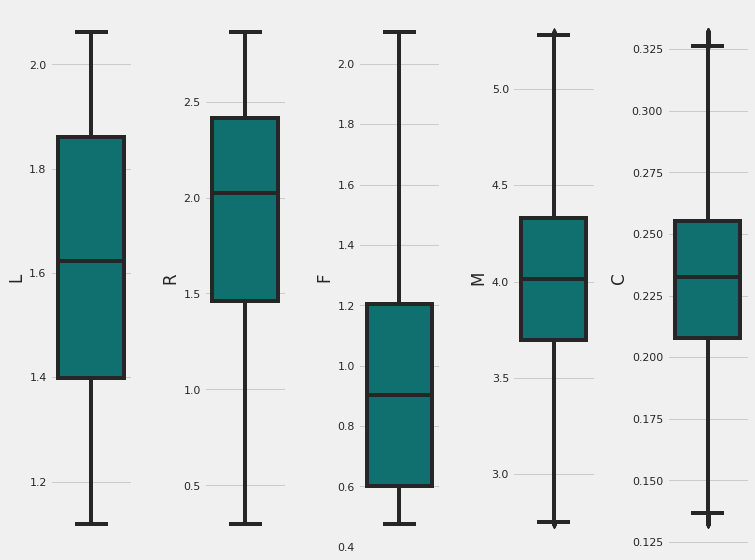

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(15,8))

# plotting
feat_num = list(df_IQR_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_IQR_LRFMC[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

# Duplicate value

In [ ]:
# Check duplicate value
df_IQR_LRFMC.duplicated().sum()

78

In [ ]:
# Drop duplicated value
df_IQR_LRFMC = df_IQR_LRFMC.drop_duplicates().reset_index(drop=True)
df_IQR_LRFMC

,L,R,F,M,C
0,2.049606,1.544068,1.397940,5.278328,0.319568
1,1.339783,0.301030,2.045323,5.273207,0.304486
2,2.055633,1.204120,1.748188,5.187151,0.331630
3,1.675473,0.845098,1.929419,5.271428,0.287361
4,1.679125,0.954243,1.491362,5.214849,0.313289
...,...,...,...,...,...
55137,1.877755,2.359835,0.477121,2.752048,0.228124
55138,1.728083,2.416641,0.477121,2.954725,0.152288
55139,1.818226,2.322219,0.477121,2.956649,0.150756
55140,1.680033,2.675778,0.477121,2.921686,0.146128


# Scaling

In [ ]:
# Standardize data 

std = StandardScaler().fit_transform(df_IQR_LRFMC)
df_std_LRFMC = pd.DataFrame(std, columns = list(df_IQR_LRFMC))
df_std_LRFMC

,L,R,F,M,C
0,1.638865,-0.567751,1.254030,2.899821,2.436112
1,-1.074189,-2.522903,3.064036,2.888030,2.021912
2,1.661903,-1.102449,2.233282,2.689878,2.767354
3,0.208871,-1.667148,2.739982,2.883933,1.551613
4,0.222830,-1.495477,1.515226,2.753655,2.263657
...,...,...,...,...,...
55137,0.982026,0.715355,-1.320471,-2.917142,-0.075190
55138,0.409956,0.804703,-1.320471,-2.450463,-2.157817
55139,0.754495,0.656189,-1.320471,-2.446033,-2.199887
55140,0.226301,1.212296,-1.320471,-2.526536,-2.326994


# Modeling (K-Means)

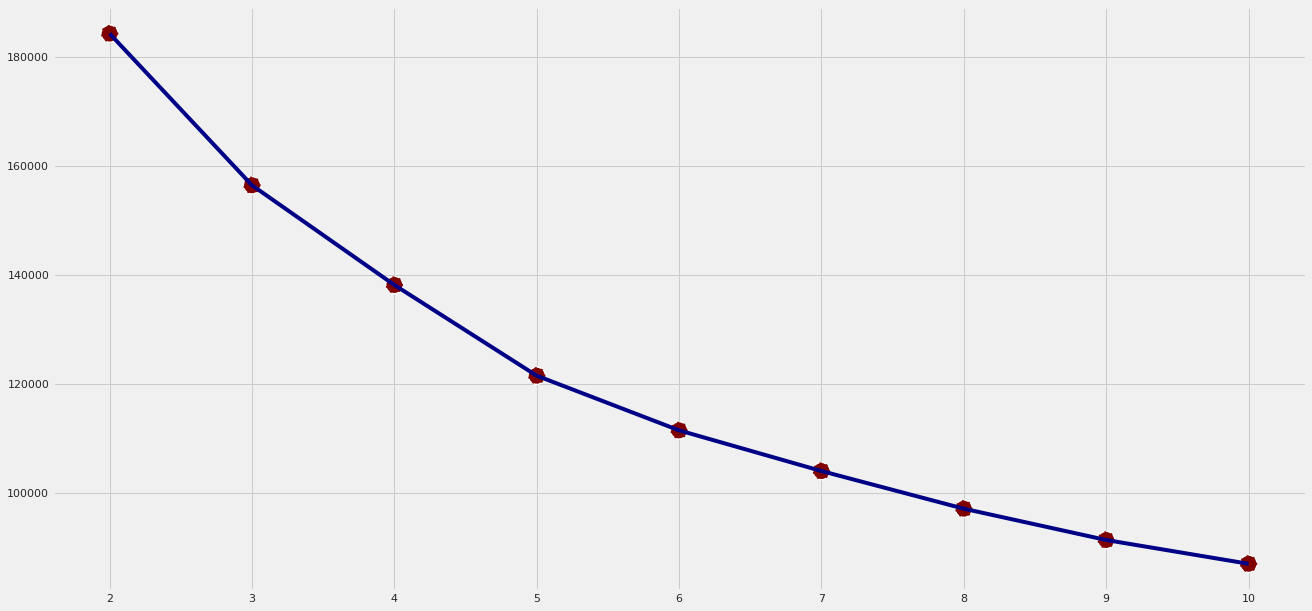

In [ ]:
# Inertia

inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std_LRFMC)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

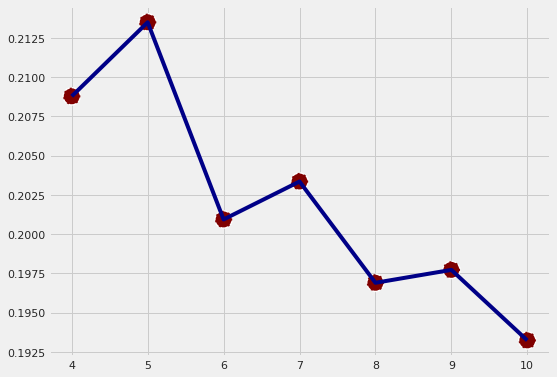

In [ ]:
# Silhouette Score

range_n_clusters = list(range(4,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std_LRFMC)
    preds = kmeans.predict(df_std_LRFMC)
     
    score_euclidean = silhouette_score(df_std_LRFMC, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)
    
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(4,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(4,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

In [ ]:
# K-Means
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_std_LRFMC)

# Assign Cluster
cluster = kmeans.labels_
df_std_LRFMC['clusters'] = cluster
df_IQR_LRFMC['clusters'] = cluster
df_IQR_LRFMC.head()

,L,R,F,M,C,clusters
0,2.049606,1.544068,1.397940,5.278328,0.319568,0
1,1.339783,0.301030,2.045323,5.273207,0.304486,0
2,2.055633,1.204120,1.748188,5.187151,0.331630,0
3,1.675473,0.845098,1.929419,5.271428,0.287361,0
4,1.679125,0.954243,1.491362,5.214849,0.313289,0


In [ ]:
df_std_LRFMC.head()

,L,R,F,M,C,clusters
0,1.638865,-0.567751,1.254030,2.899821,2.436112,0
1,-1.074189,-2.522903,3.064036,2.888030,2.021912,0
2,1.661903,-1.102449,2.233282,2.689878,2.767354,0
3,0.208871,-1.667148,2.739982,2.883933,1.551613,0
4,0.222830,-1.495477,1.515226,2.753655,2.263657,0


# Visualization using PCA & Scatter Plot

In [ ]:
pca = PCA(n_components=2)

pca.fit(df_std_LRFMC)
pcs = pca.transform(df_std_LRFMC)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = cluster
data_pca

,PC 1,PC 2,clusters
0,3.494448,-2.726469,0
1,4.873504,-1.425746,0
2,4.039866,-3.189958,0
3,4.506677,-1.711196,0
4,3.803057,-1.892332,0
...,...,...,...
55137,-3.401020,-0.328784,4
55138,-1.868084,2.027471,2
55139,-1.784939,1.844622,2
55140,-2.062750,2.292491,2


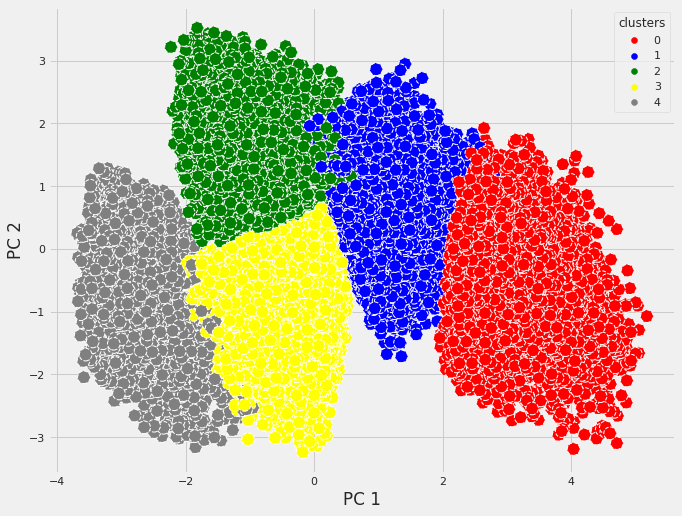

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    linestyle='--',
    data=data_pca,
    palette=['red','blue','green','yellow', 'gray'],
    s=160,
    ax=ax
)

Nilai setiap titik memiliki nilai "siku" yang mirip, tetapi nilai K-5 memiliki "siku" yang optimal.

Jika dibandingkan visualisasi clustering dengan PCA, maka nilai k-5 merupakan jumlah cluster yang tepat.

In [ ]:
avg_cluster_mean = df_std_LRFMC.groupby('clusters').mean().reset_index(drop=True)
avg_cluster_mean

,L,R,F,M,C
0,0.625789,-1.153581,1.449369,1.306530,0.239086
1,-0.898017,-0.342895,0.372250,0.426270,0.011659
2,-0.428931,0.598109,-0.865739,-0.774042,-1.297467
3,0.924510,0.108036,-0.036688,0.052069,0.007135
4,-0.316506,0.763477,-0.912289,-1.012250,0.863765


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for i in range(5):
    fig.add_trace(go.Scatterpolar(r=avg_cluster_mean.loc[i].values.tolist() + avg_cluster_mean.loc[i].values.tolist()[:1],
                                  theta=avg_cluster_mean.columns.tolist() + avg_cluster_mean.columns.tolist()[:1],
                                  name="CLUSTER-%s"%avg_cluster_mean.index[i],
                                  showlegend=True))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[-1.5, 1.5])))

fig.show()

# Insight



Cluster 0 (Customer Group 1)

- Terlihat pada fitur L tinggi sehingga merupakan user lama yang sudah terdaftar
- User lama namun memiliki jumlah penerbangan yang sedikit sehingga pada fitur F dan M cenderung rendah
- User pada cluster ini memiliki nilai C yang cukup tinggi, sehingga bisa diasumsikan user tersebut hanya sesekali melakukan penerbangan karena adanya promo

Cluster 1 (Customer Group 2)

- Terlihat pada fitur L rendah sehingga merupakan user baru
- User baru yang baru saja melakukan penerbangan dimana memiliki frekuensi penerbangan yang cukup tinggi
- User pada cluster ini memiliki nilai C yang tinggi, sehingga bisa diasumsikan user tersebut tertarik melakukan penerbangan karena adanya promo

Cluster 2 (Customer Group 3)

- Terlihat pada fitur L rendah sehingga merupakan user baru
- User lama namun memiliki jumlah penerbangan yang sedikit sehingga pada fitur F cenderung rendah
- User pada cluster ini jarang melakukan penerbangan akan tetapi ketika melakukan penerbangan memiliki tujuan yang jauh sehingga pada fitur M cukup tinggi

Cluster 3 (Customer Group 4)

- Pada cluster ini memiliki nilai yang hampir merata pada setiap LRFMC, sehingga bisa diasumsikan bukan user yang terlalu baru
- Terlihat pada fitur C tinggi sehingga sering melakukan penerbangan dan merupakan user-user yang melakukan pencarian promo

Cluster 4 (Customer Group 5)

- Pada cluster ini adalah user yang tidak terlalu baru
- Terlihat pada fitur C rendah sehingga dapat dikatakan user-user yang tidak terlalu tertarik dengan adanya promo